# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

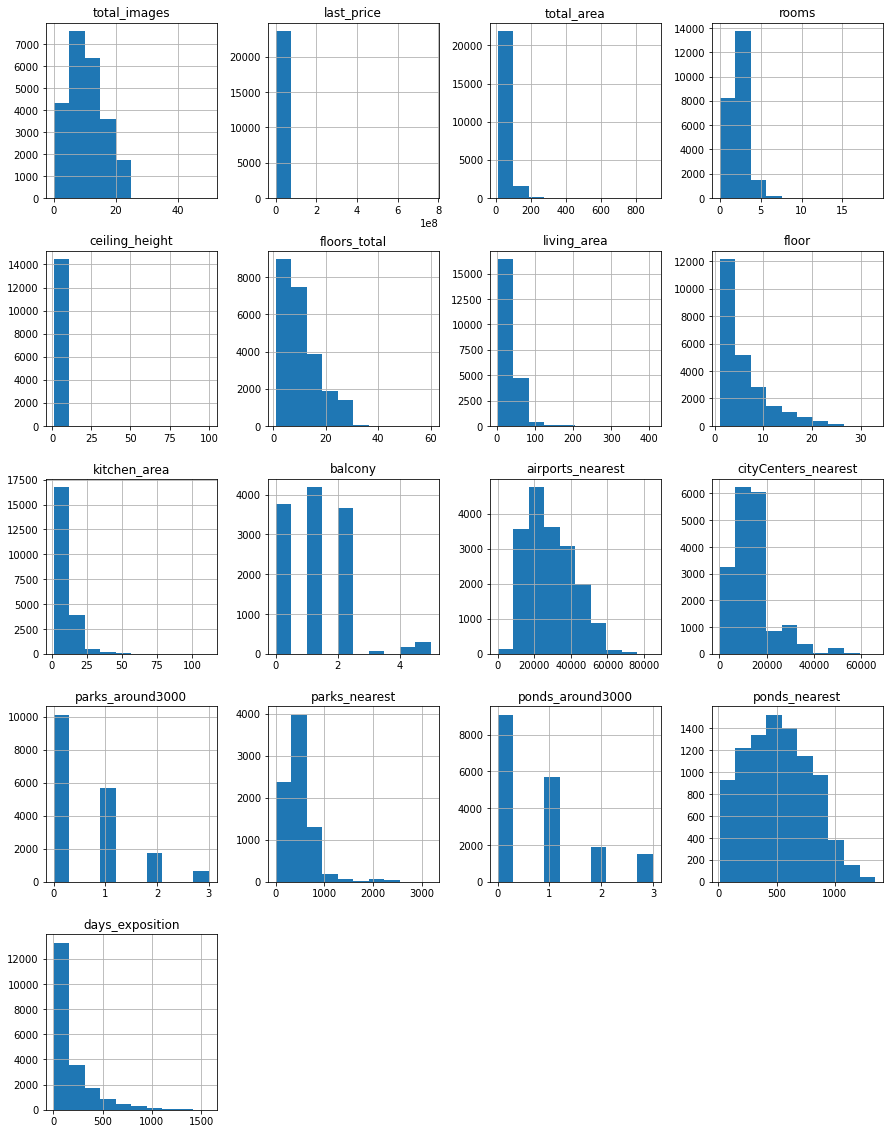

In [6]:
data.hist(figsize=(15, 20))

**Вывод** В данных есть пропуски, некоторые столбцы имеют неправильное название (не по правилам snake_case),  указаны неправильные типы данных в столбцах. 

- first_day_exposition - тип object, не datetime
- ceiling_height - есть нули
- floors_total - тип float, не int (количество этажей не может быть не целым числом), есть небольшое количество нулевых значений
- living_area - есть нули
- is_apartment - тип object, должен быть bool, большая часть пропущенных значений
- kitchen_area - есть нули (нужно смотреть внимательнее, может в квартире нет кухни или она соединена с комнатой?)
- balcony - тип float, должен быть int (целое число балконов), есть нулевые значения (нужно смотреть внимательнее, может в квартире нет балконов?)
- locality_name - есть нули (небольшое количество)
- airports_nearest - есть нули
- cityCenters_nearest - неправильное название столбика, есть нули
- parks_around3000 - тип float, должен быть int (количество парков), есть нули, непривычное название
- parks_nearest - есть нули
- ponds_around3000 - тип float, должен быть int (количество прудов), есть нули, непривычное название
- ponds_nearest - есть нули
- days_exposition - тип float, должен быть int (количество дней публикации), есть нули

**Вывод**: В данных много пропущенных значений, некоторые столбцы не соответствуют заявленным типам данных. Необходимо рассмотреть каждый столбец по-отдельности, чтобы изменить типы данных на необходимые, заполнить пропущенные значения (где возможно), а потом уже делать какие-либо выводы. Данные сырые.

### Предобработка данных

Переименуем столбец cityCenters_nearest, а так же ponds_around3000 и parks_around3000.

In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'}, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Изменим тип данных в столбце first_day_exposition на datetime.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Проверим столбец balcony на отсутствуещие значения.

In [9]:
data['balcony'].isna().sum()

11519

Отстуствующих значений почти половина от всех значений столбца (23699). Можно предположить, что если про балкон не сказано, то значит его просто нет. Посмотрим на пустые значения в столбце с балконами

In [10]:
data.loc[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски с балконами заполним нулями.

In [11]:
data['balcony']=data['balcony'].fillna(0).astype('int')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

Посмотрим на столбец locality_name, найдем уникальные значения и дубликаты.

In [12]:
data['locality_name'].unique().shape[0]

365

Приведем все названия к нижнему регистру и заменим "ё" на "е" и проверим результат. Из-за человеческого фактора одни и те же названия могут распознаваться по-разному.

In [13]:
data['locality_name'] = (data['locality_name']
                         .str.lower()
                         .str.replace('ё','е')
                         .str.replace('городской поселок','поселок городского типа')
                        )

In [14]:
data['locality_name'].duplicated().sum()

23375

In [15]:
data['locality_name'].unique().shape[0]

324

In [16]:
data.duplicated().sum()

0

In [17]:
data['locality_name'].value_counts()

санкт-петербург            15721
поселок мурино               556
поселок шушары               440
всеволожск                   398
пушкин                       369
                           ...  
деревня сижно                  1
деревня пижма                  1
поселок высокоключевой         1
деревня пикколово              1
поселок станции лужайка        1
Name: locality_name, Length: 323, dtype: int64

Рассмотрим отдельно парки и пруды.

In [18]:
data['ponds_around'].isna().sum()

5518

In [19]:
data['parks_around'].isna().sum()

5518

In [20]:
data['parks_around'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [21]:
data['ponds_around'].unique()

array([ 2.,  0.,  3.,  1., nan])

Отсутствие значений в столбцах с парками и прудами может означать только 0 значения в ячейках с пропущенными значениями. Также изменим тип данных float на int.

In [22]:
data['parks_around'] = data['parks_around'].fillna(0).astype('int')
data['ponds_around'] = data['ponds_around'].fillna(0).astype('int')

In [23]:
display(data['parks_around'], data['ponds_around'])

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around, Length: 23699, dtype: int64

0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    0
23696    0
23697    3
23698    0
Name: ponds_around, Length: 23699, dtype: int64

Рассмотрим расстояния до парков и прудов.

In [24]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [25]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [26]:
data['parks_nearest'].isna().sum()

15620

In [27]:
data['ponds_nearest'].isna().sum()

14589

Можно сделать предположение, что столбцы parks_nearest и parks_around, ponds_nearest и ponds_around связаны между собой. Однако в столбце parks_nearest максимальное значение 3190 (м), хотя столбик parks_around показывает число парков на расстоянии до 3 км (3000 м) от квартиры. Подозрительно.

В столбцах parks_nearest и ponds_nearest пропущено больше половины значений. Ошибка в выгрузке данных? Возможно. По данным, которые у нас есть, медиана и среднее не сильно отличаются друг от друга. Можно заполнить пропущенные значения средним в двух столбцах.

In [29]:
data['parks_nearest'].isna().sum()

15620

In [30]:
data['ponds_nearest'].isna().sum()

14589

Посмотрим на этажность дома в столбце floors_total.

In [31]:
data.loc[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,0,санкт-петербург,39197.0,12373.0,1,123.0,0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0,санкт-петербург,22041.0,17369.0,0,NaN,1,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0,санкт-петербург,37364.0,8322.0,2,309.0,2,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0,санкт-петербург,22041.0,17369.0,0,NaN,1,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0,санкт-петербург,22735.0,11618.0,1,835.0,1,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0,санкт-петербург,39886.0,10660.0,1,2276.0,3,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0,санкт-петербург,43074.0,10820.0,0,NaN,0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0,санкт-петербург,22041.0,17369.0,0,NaN,1,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,False,False,12.30,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,False,False,12.00,0,кудрово,NaN,NaN,0,NaN,0,NaN,231.0


In [32]:
data['floors_total'].isna().sum()

86

In [33]:
data.dropna(subset=['floors_total'], inplace=True)

In [34]:
data['floors_total'].isna().sum()

0

In [35]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

60 этажей слишком много, а 1-этажное здание - это частный дом? Построим гистограмму.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

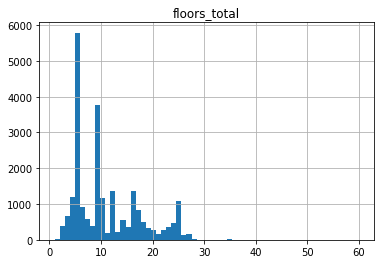

In [36]:
data.hist('floors_total', bins=60)

Выше 30 этажей зданий мало. Удалим выбросы.

In [37]:
data.drop(index=data.query('floors_total > 30').index, inplace=True)

In [38]:
data['floors_total'].describe()

count    23581.000000
mean        10.638947
std          6.530499
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

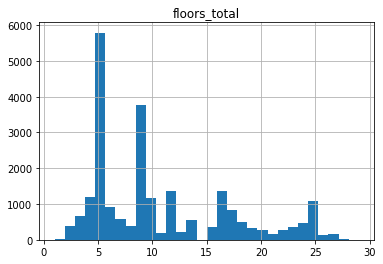

In [39]:
data.hist('floors_total', bins=30)

Много 5 и 9-этажных зданий.

Посмотрим на столбик is_apartment.

In [40]:
data.loc[data['is_apartment'] == False].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,False,False,6.0,1,ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,False,False,False,15.0,2,санкт-петербург,34967.0,14640.0,0,NaN,1,564.0,300.0
29,9,8600000.0,100.0,2016-04-09,3,NaN,19.0,52.0,15,False,False,False,11.0,0,санкт-петербург,30394.0,11526.0,1,532.0,1,896.0,125.0
36,13,3790000.0,45.0,2017-01-25,2,NaN,9.0,27.0,9,False,False,False,6.3,2,санкт-петербург,49574.0,16461.0,1,459.0,0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04,3,NaN,14.0,59.0,8,False,False,False,12.0,5,санкт-петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
42,13,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.6,5,петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0
50,1,4500000.0,48.2,2017-11-13,1,2.70,5.0,25.4,4,False,False,False,9.0,1,пушкин,19841.0,30183.0,1,531.0,3,330.0,152.0
56,14,4350000.0,41.0,2016-03-28,1,2.80,7.0,18.1,4,False,False,False,11.1,2,санкт-петербург,13772.0,9626.0,1,271.0,1,439.0,152.0
66,6,3450000.0,34.0,2015-12-16,1,2.60,17.0,17.4,8,False,False,False,11.5,2,поселок мурино,NaN,NaN,0,NaN,0,NaN,186.0
69,6,4010000.0,50.7,2018-09-16,2,2.60,5.0,28.9,5,False,False,False,9.0,2,выборг,NaN,NaN,0,NaN,0,NaN,194.0


Количество пропущенных значений слишком мало, чтобы можно по остальным данным из таблицы судить о пропусках в столбце с этажностью дома. Оставляем столбец нетронутым.

В столбце is_apartment есть пропущенные значения. Обычно говорится, что квартира относится к апартаментам, иначе считают, что не относится. Заменим пропущенные значения на False. Изменим тип данных на bool.

In [41]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [42]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [43]:
data['is_apartment'].unique()

array([False,  True])

Оставим данные в days_exposition нетронутыми, т.к. отсутствующие значения могут говорить, что объявление еще не снято с публикации и, как следствие, нельзя посчитать, сколько дней было размещено объявление (от публикации до снятия).

In [44]:
data['days_exposition'].isna().sum()

3165

In [45]:
data.loc[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,NaN,22.0,NaN,3,False,False,False,NaN,1,санкт-петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02,2,2.65,9.0,30.30,7,False,False,False,7.0,0,санкт-петербург,30011.0,12872.0,0,NaN,0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31,2,2.60,24.0,29.70,9,False,False,False,8.3,2,санкт-петербург,15114.0,12702.0,0,NaN,0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22,1,2.50,9.0,18.00,7,False,False,False,6.0,0,санкт-петербург,45341.0,16603.0,1,675.0,0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.00,2,False,False,False,11.0,1,санкт-петербург,16510.0,6582.0,1,526.0,0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27,3,2.50,9.0,39.00,8,False,False,False,6.2,0,санкт-петербург,33623.0,12267.0,1,334.0,1,333.0,NaN
81,9,10949000.0,68.0,2018-12-27,1,NaN,10.0,NaN,6,False,False,False,NaN,0,санкт-петербург,NaN,NaN,0,NaN,0,NaN,NaN
84,11,2400000.0,43.9,2019-03-13,2,NaN,2.0,27.46,1,False,False,False,5.2,0,кировск,NaN,NaN,0,NaN,0,NaN,NaN


Просмотрим на нулевые значения в столбце с количеством комнат rooms.

In [46]:
data['rooms'].describe()

count    23581.000000
mean         2.071583
std          1.078653
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
# нулевых значений не так много, но разглядеть их по подробнее всё равно стоит
data.query('rooms == 0')['rooms'].count()

192

In [48]:
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,поселок мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1,поселок парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,поселок шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,True,False,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0,поселок шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,False,True,NaN,1,поселок мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,False,True,NaN,1,поселок новый свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.00,7,False,False,True,NaN,2,поселок мурино,NaN,NaN,0,NaN,0,NaN,483.0


Кажется, что квартиры, где 0 комнат и 0 кухонь, являются студиями, в которых комната и кухня соединены. Оставим данные нетронутыми.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

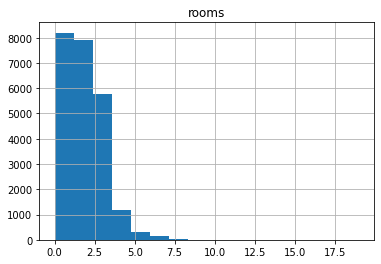

In [49]:
data.hist('rooms', bins=16)

Есть квартиры и с 16 комнатами, но в основном, квартир больше, чем с пятью комнатами, нет. Удалим аномальные значения.

In [50]:
data['rooms'].value_counts()

1     8006
2     7897
3     5790
4     1177
5      325
0      192
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [51]:
data.drop(index=data.query('rooms > 5').index, inplace=True)

In [52]:
data['rooms'].value_counts()

1    8006
2    7897
3    5790
4    1177
5     325
0     192
Name: rooms, dtype: int64

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

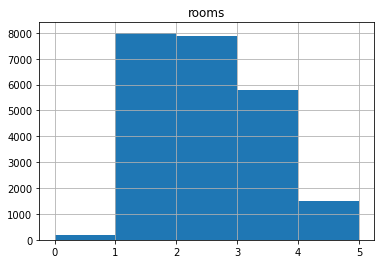

In [53]:
data.hist('rooms', bins=5)

Больше всего квартир с 1 и 2 комнатами.

Просмотрим столбец total_images на аномальные значения.

In [54]:
data['total_images'].value_counts()

10    1776
9     1712
20    1654
8     1570
7     1509
6     1466
11    1353
5     1271
12    1209
0     1046
13    1006
14     976
4      958
15     941
1      852
16     757
3      753
17     644
18     637
2      634
19     588
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

В таблице total_images всё окей.

Рассмотрим потолки в столбце ceiling_height.

In [55]:
data['ceiling_height'].describe()

count    14343.000000
mean         2.764807
std          1.250043
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Есть потолок равный 1 метру, а есть потолки 100 метров. Посмотрим на значения ближе.

In [56]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.54,   3.53,   2.83,   4.7 ,   2.4 ,
         3.38,   3.01,   5.6 ,   3.65,   3.18,   3.35,   2.3 ,   3.57,
         2.48,   2.62,   2.82,   3.98,   2.63,   3.83,   3.52,   3.95,
         3.75,   3.67,   3.66,   3.85,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,   3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
      

In [57]:
data['ceiling_height'].value_counts()

2.50    3512
2.60    1644
2.70    1566
3.00    1094
2.80     982
        ... 
3.98       1
1.00       1
2.34       1
3.83       1
3.76       1
Name: ceiling_height, Length: 176, dtype: int64

<AxesSubplot:ylabel='Frequency'>

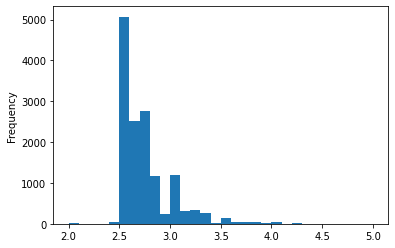

In [58]:
data['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=30, range=(2,5))

Среднее значение не сильно отличается от медианы, значит выбросы не влияют на основные выводы. Выбросы  и пропуски нужно поменять на медианное значение.

In [59]:
# убираем пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [60]:
data['ceiling_height'].isna().sum()

0

In [61]:
# убираем выбросы, ограничив выборку предельно допустимыми значениями (2.5 и 5 метров)
data.query('ceiling_height > 2.4 and ceiling_height < 5')['ceiling_height'].mean()

2.693536402248059

In [62]:
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = 2.7

In [63]:
data.query('ceiling_height < 2.4 and ceiling_height > 5')['ceiling_height'].sum()

0.0

In [64]:
data['ceiling_height'].describe()

count    23387.000000
mean         2.693361
std          0.209251
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Просмотрим столбец living_area.

In [65]:
data['living_area'].describe()

count    21531.000000
mean        33.488318
std         18.556520
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

In [66]:
data.query('living_area < 10')['living_area'].count()

25

In [67]:
data.query('living_area > 200')['living_area'].count()

8

<AxesSubplot:ylabel='Frequency'>

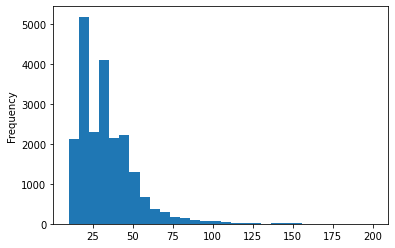

In [68]:
data['living_area'].sort_values().plot(y='living_area', kind='hist', bins=30, range=(10,200))

In [69]:
(data
    .drop(index=data
          .query('living_area < 10')
          .index,inplace=True)
)

(data
    .drop(index=data
          .query('living_area > 200')
          .index,inplace=True)
)

In [70]:
data['living_area'].describe()

count    21498.000000
mean        33.438188
std         18.064329
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

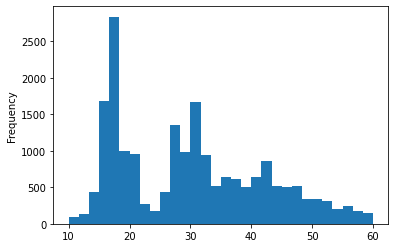

In [71]:
data['living_area'].sort_values().plot(y='living_area', kind='hist', bins=30, range=(10,60))

In [72]:
data['living_area'].isna().sum()

1856

Если сравнить среднее и медиану, то они не сильно отличаются друг от друга. Да, есть странные выбросы в размер квартир 2 и 400 метров. Однако эти данные не влияют на медиану и среднее. Можно оставить столбец без изменений.

Рассмотрим расстояние до аэропорта в столбце airports_nearest.

In [73]:
data['airports_nearest'].describe()

count    17830.000000
mean     28845.841840
std      12674.531516
min          0.000000
25%      18498.000000
50%      26878.500000
75%      37402.750000
max      84869.000000
Name: airports_nearest, dtype: float64

In [74]:
data['airports_nearest'].isna().sum()
# не будем заменять пропуски на медиану, т.к. среднее и медиана не сильно различаются

5524

In [75]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0


В таблице на 22 тысячи строк есть только одна строчка, в которой расстояние до аэропорта равно нулю. Это значение можно заменить None.

In [76]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [77]:
data['airports_nearest'].describe()

count    17829.000000
mean     28847.459757
std      12673.045589
min       6450.000000
25%      18498.000000
50%      26880.000000
75%      37406.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Минимальное значение изменилось. Больше квартир, находящихся в аэропорту, нет :)

Рассмотрим столбец kitchen_area.

In [78]:
data['kitchen_area'].describe()

count    21148.000000
mean        10.437271
std          5.631973
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

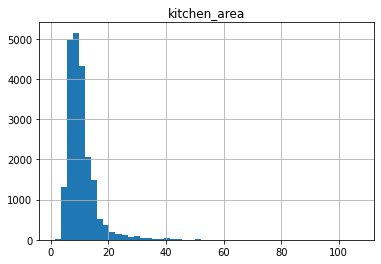

In [79]:
data.hist('kitchen_area', bins=50)

Посмотрим поближе: больше 30 кв.м. данных слишком мало.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

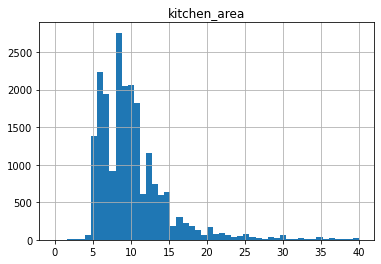

In [80]:
data.hist('kitchen_area', bins=50, range=(0,40))

Удалим аномальные данные: кухни площадью больше 25 кв.м. и меньше 2 кв.м, заполним пропуски.

In [81]:
(data
    .drop(index=data
          .query('kitchen_area < 2')
          .index,inplace=True)
)

(data
    .drop(index=data
          .query('kitchen_area > 25')
          .index,inplace=True)
)

In [82]:
data['kitchen_area'].isna().sum()

2206

В эти 2226 входят студии с отсутстующей кухней, квартиры с открытым планом, где тоже может не быть кухни и квартиры, в которых просто нет площади кухни, хотя в квартире кухня фактически есть. Мы можем заполнить данные медианой

In [83]:
data['kitchen_area'].median()

9.0

In [84]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [85]:
data['kitchen_area'].isna().sum()

0

**Вывод:** Данные подготовлены к исследованию. Были переименнованы названия столбцов, заполнены пропуски. Где возможно, были убраны аномальные значения, изменены типы данных. Если обрабатывать сырые данные, без предобработки, то пропуски могут повлиять на итоговое решение. (В некоторых столбцах были пропуски больше половины от общего количества данных). Было бы неплохо посмотреть, как именно выгружались данные.

In [86]:
# код ревьюера
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,22862.000000,2.286200e+04,22862.000000,22862.000000,22862.000000,22862.000000,21036.000000,22862.000000,22862.000000,22862.000000,17370.000000,17392.000000,22862.000000,7612.000000,22862.000000,8599.000000,19889.000000
mean,9.794113,5.822821e+06,57.286643,2.010848,2.688563,10.690447,32.852013,5.866547,9.751974,0.595049,28824.923143,14389.591076,0.453154,492.021414,0.571166,524.065124,178.537885
std,5.637466,5.678010e+06,26.682782,0.962335,0.202614,6.540089,16.991325,4.851091,3.534582,0.957816,12735.850407,8588.294269,0.734025,338.946356,0.867236,276.612962,217.146594
min,0.000000,4.300000e+05,12.000000,0.000000,2.400000,1.000000,10.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.200000,0.000000,18427.000000,9628.000000,0.000000,288.000000,0.000000,303.000000,44.000000
50%,9.000000,4.550000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26833.500000,13222.000000,0.000000,456.000000,0.000000,509.000000,94.000000
75%,14.000000,6.500000e+06,67.400000,3.000000,2.700000,16.000000,41.900000,8.000000,11.000000,1.000000,37407.000000,16383.500000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,1.599840e+08,500.000000,5.000000,5.000000,29.000000,200.000000,27.000000,25.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посчитайте и добавьте в таблицу новые столбцы

Нужно добавить в таблицу:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города


In [87]:
# цена одного квадратного метра
data['price_per_sq_m'] = (data['last_price'] / data['total_area']).astype('int')
data['price_per_sq_m']

0        120370
1         82920
2         92785
3        408176
5         95065
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_sq_m, Length: 22862, dtype: int64

In [88]:
data['price_per_sq_m'].describe().round(1)

count     22862.0
mean      97210.3
std       41829.1
min        7962.0
25%       75980.0
50%       94320.0
75%      112948.5
max      995983.0
Name: price_per_sq_m, dtype: float64

**Вывод:** Средняя цена за квадратный метр - 99 тыс.руб.

In [89]:
# день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['exposition_day']= data['first_day_exposition'].dt.weekday

In [90]:
# месяц публикации объявления
data['exposition_month']=data['first_day_exposition'].dt.month

In [91]:
# год публикации объявления
data['exposition_year']=data['first_day_exposition'].dt.year

In [92]:
data['exposition_day'].value_counts()

3    4133
1    4047
4    3862
2    3838
0    3477
5    1871
6    1634
Name: exposition_day, dtype: int64

In [93]:
data['exposition_month'].value_counts()

2     2541
3     2496
11    2292
4     2279
10    2057
9     1920
6     1709
8     1694
7     1621
12    1590
1     1439
5     1224
Name: exposition_month, dtype: int64

In [94]:
data['exposition_year'].value_counts()

2018    8257
2017    7909
2019    2762
2016    2686
2015    1124
2014     124
Name: exposition_year, dtype: int64

**Вывод:** Суботта и воскресенье - самые "невыгодные дни" для продажи квартир, самый пиковый месяц - февраль, самый невыгодный - май. 2017 и 2018 годы - пиковые для предложений о продаже квартир. В 2019 число предложений сократилось почти в 4 раза.

Добавим тип этажа квартиры (значения — «первый», «последний», «другой»).

In [95]:
# создадим функцию по строке для столбца floor
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis=1)
data['floor_category'].value_counts()

другой       16813
последний     3189
первый        2860
Name: floor_category, dtype: int64

Добавим расстояние в км до центра города.

In [96]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'].describe()

count    17392.000000
mean        14.383682
std          8.596651
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

**Вывод:** Рынок недвижимости достиг своего пика по предложениям о продаже квартир в 2017 и 2018 годах. Квартиры в среднем находятся в 14 км от центра. Первые и последние этажи продаются хуже всего. Покупатели выбирают любые этажи кроме последних и первых. И при этом средняя цена за кв.м - 99 тыс. руб. 

### Проведите исследовательский анализ данных

Изучим следующие столбики:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Изучим данные об общей площади квартир total_area.

In [97]:
data['total_area'].describe()

count    22862.000000
mean        57.286643
std         26.682782
min         12.000000
25%         40.000000
50%         51.000000
75%         67.400000
max        500.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры - 12 кв.м. Максимальная - 900 кв.м. Среднее и медиана не сильно отличаются друг от друга, но построить график стоит.

<AxesSubplot:ylabel='Frequency'>

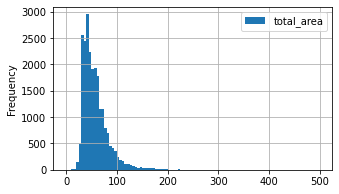

In [98]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))

Большая часть предложений находится до 100 кв.м. Посмотрим подробнее на диаграмму размаха, убрав значения больше 150 кв.м.

<AxesSubplot:>

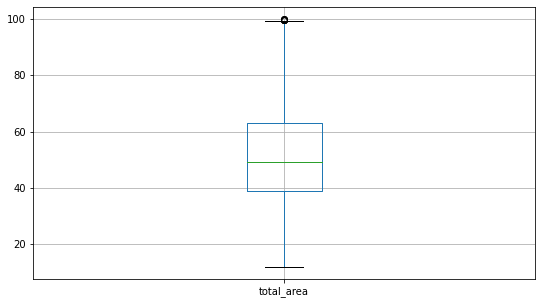

In [99]:
(data
    .query('total_area < 100')
    .boxplot(column=['total_area'], figsize=(9,5), grid=True)
)

Построим еще гистограмму для значений до 100 кв.м.

<AxesSubplot:ylabel='Frequency'>

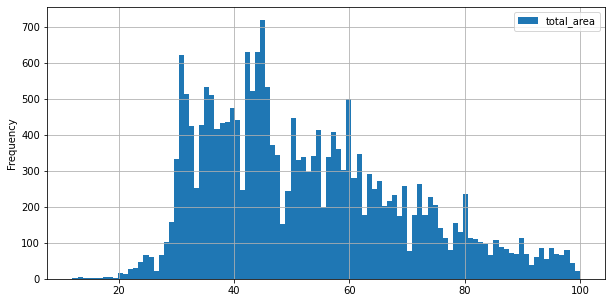

In [100]:
(data
    .query('total_area < 100')
    .sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',bins=100, grid=True, figsize=(10,5))
)

Большая часть квартир (по площади) находится в диапазоне от 30 до 100 метров.

Рассмотрим жилую площадь living_area. 

In [101]:
data['living_area'].describe()

count    21036.000000
mean        32.852013
std         16.991325
min         10.000000
25%         18.500000
50%         30.000000
75%         41.900000
max        200.000000
Name: living_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

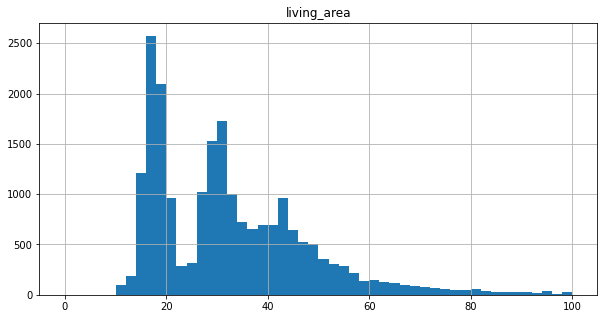

In [102]:
data.hist('living_area', bins=50, range=(0,100), grid=True, figsize=(10,5))

Жилая площадь находится в диапазоне от 16 до 60 кв.м.

Посмотрим на площади кухни, убрав значения больше 25.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

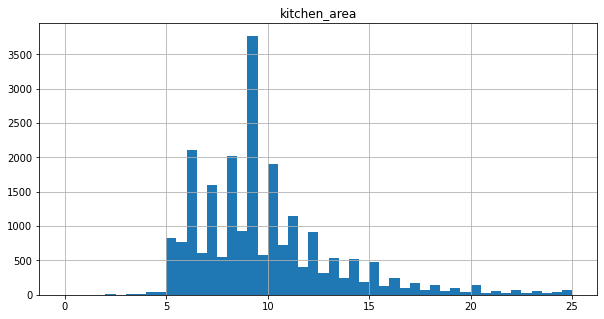

In [103]:
data.hist('kitchen_area', bins=50, range=(0,25), grid=True, figsize=(10,5))

Есть квартиры, где у кухни площадь 0 кв.м. Такие значения появляются, т.к. кухня соединена с комнатой и площадь кухни уже включена в площадь комнаты.

Посмотрим на цены на квартиры, переведем цены в целые числа для удобства просмотра данных.

In [104]:
data['last_price'] = data['last_price'].apply(pd.to_numeric)

In [105]:
data['last_price'].describe().astype(int)

count        22862
mean       5822820
std        5678009
min         430000
25%        3400000
50%        4550000
75%        6500000
max      159984000
Name: last_price, dtype: int64

Есть квартиры и за 159 млн.руб. Многовато для однокомнатной квартиры. Скорее всего такие евартиры реально есть в базе данных, но они влияют на большую часть данных. Уберем из данных квартиры, которые стоят больше 12 млн.

<AxesSubplot:>

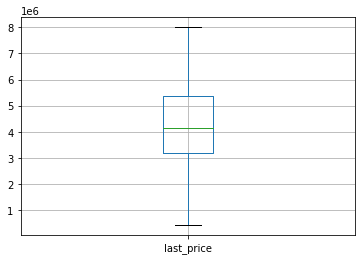

In [106]:
data.query('last_price < 8000000').boxplot('last_price')

<AxesSubplot:ylabel='Frequency'>

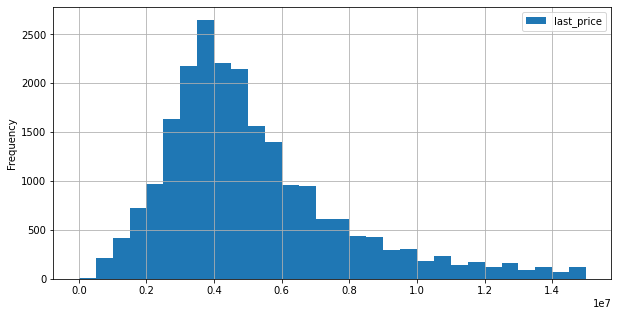

In [107]:
data.plot(kind='hist', y='last_price', grid=True, bins=30, figsize=(10,5), range=(0,15000000))

In [108]:
data.drop(index=data.query('last_price > 12000000').index, inplace=True)

In [109]:
data['last_price'].describe().astype(int)

count       21453
mean      4844529
std       2244754
min        430000
25%       3300000
50%       4400000
75%       5995000
max      12000000
Name: last_price, dtype: int64

Квартиры за 430 тыс.руб. тоже выглядят подозрительно. Уберем значения ниже 1 млн.руб.

In [110]:
data.drop(index=data.query('last_price < 1000000').index, inplace=True)

In [111]:
data['last_price'].describe().astype(int)

count       21229
mean      4887505
std       2216967
min       1000000
25%       3350000
50%       4450000
75%       6000000
max      12000000
Name: last_price, dtype: int64

Стоимость квартиры в 4,45 млн.руб. кажется адекватной.

Построим гистограмму цен, ограничив разброс до 9 миллионов рублей (цена выше для наших данных редкость).

<AxesSubplot:ylabel='Frequency'>

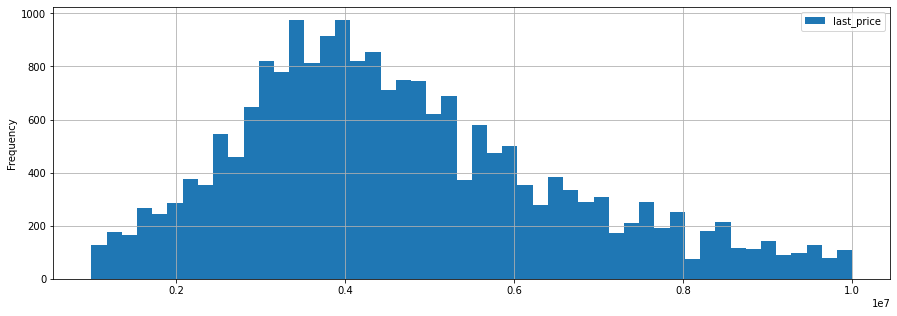

In [112]:
(data
    .query('last_price < 10000000')
    .plot(kind='hist', y='last_price', grid=True, bins=50, figsize=(15,5))
)

Средняя цена на квартиру - 4,45 млн.руб.

Рассмотрим предложения по столбцу с количеством комнат.

<AxesSubplot:ylabel='Frequency'>

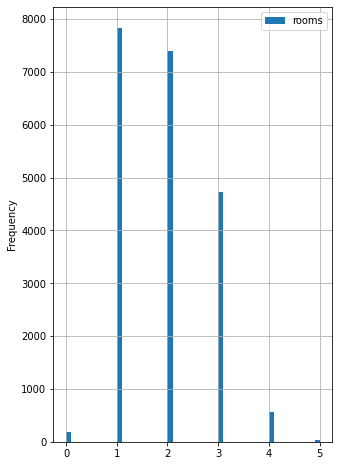

In [113]:
(data
    .query('total_area < 100')
    .plot(kind='hist', y='rooms', grid=True, bins=50, figsize=(5,8))
)

Большая часть предложений о продаже квартир - 1 и 2-х комнатные квартиры.

Построим график разброса для квартир в зависимости от высоты потолков.

<AxesSubplot:>

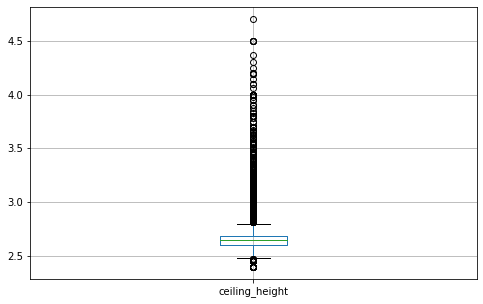

In [114]:
(data
    .query('total_area < 100')
    .boxplot(column=['ceiling_height'], figsize=(8,5), grid=True)
)

По данным графика "ящик с ушами" отсечем квартиры с потолками выше 3 метров и ниже 2.4 метров.

<AxesSubplot:ylabel='Frequency'>

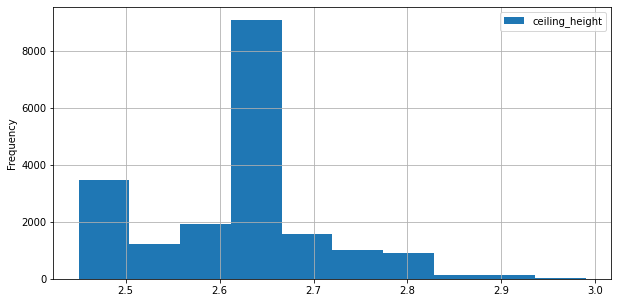

In [115]:
(data
    .query('ceiling_height < 3 and ceiling_height > 2.4')
    .plot(kind='hist', y='ceiling_height', grid=True, bins=10, figsize=(10,5))
)

Большая часть квартир имеет потолки 2.75 м.

Обратим внимание на этажность, разделяя этажи на категории: первый, последний и другой.

<AxesSubplot:xlabel='floor_category', ylabel='count'>

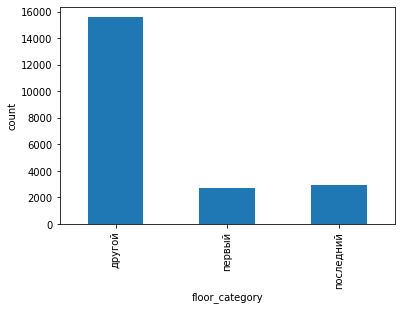

In [116]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count')

Квартиры на первом и последних этажах составляют малую часть от всех предложениях о продаже.

<AxesSubplot:ylabel='Frequency'>

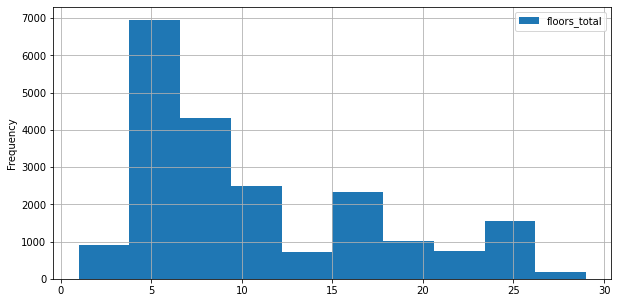

In [117]:
data.plot(kind='hist', y='floors_total', grid=True, bins=10, figsize=(10,5))

Санкт-Петербург - не город высоток, большая часть квартир находится в домах до 10 этажей.

Посмотрим на расстояние до центра города.

<AxesSubplot:ylabel='Frequency'>

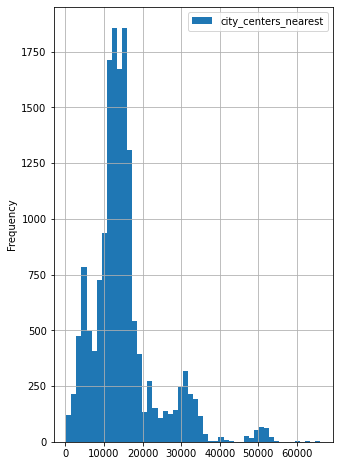

In [118]:
(data
    .plot(kind='hist', y='city_centers_nearest', grid=True, bins=50, figsize=(5,8))
)

Большая часть квартир располагается в 20 км от центра города.

Изучим расстояние до аэропорта.

<AxesSubplot:ylabel='Frequency'>

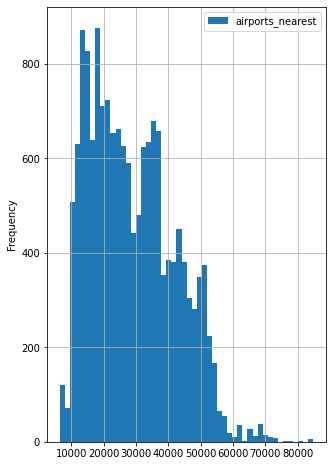

In [119]:
(data
    .plot(kind='hist', y='airports_nearest', grid=True, bins=50, figsize=(5,8))
)

Большая часть квартир расположена от 10 до 40 км от аэропорта.

Посмотрим на удаленность квартир от парков. Отбросим значения больше 1 км, т.кю они составляют незначительную часть от общих данных.

<AxesSubplot:ylabel='Frequency'>

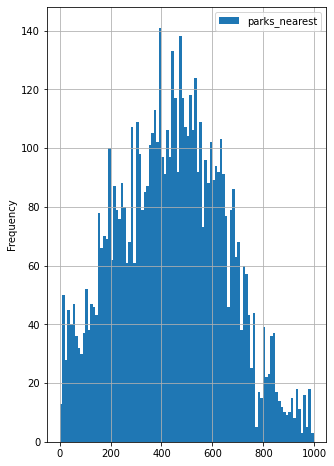

In [120]:
(data
    .query('parks_nearest < 1000')
    .plot(kind='hist', y='parks_nearest', grid=True, bins=100, figsize=(5,8))
)

Большая часть квартир располагается в 500 м от парков. Кажется, что при формировании предложения о продаже риэлторы указывали примерное среднее расстояние до парка. 

Посмотрим на количество предложений по месяцам и дням.

<AxesSubplot:ylabel='Frequency'>

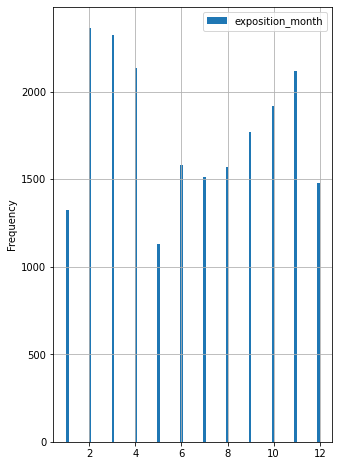

In [121]:
(data
    .plot(kind='hist', y='exposition_month', grid=True, bins=100, figsize=(5,8))
)

Пик предложений по квартирам - февраль и март. Самый невыгодный месяц - май.

<AxesSubplot:ylabel='Frequency'>

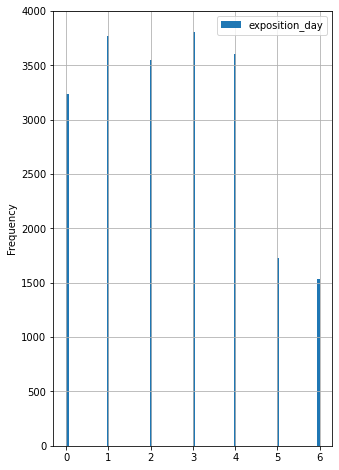

In [122]:
(data
    .plot(kind='hist', y='exposition_day', grid=True, bins=100, figsize=(5,8))
)

Вторник и четверг - пики по предложениям о продаже квартир. Суббота и воскресенье - самые невыгодные.

Изучим, как быстро продавались квартиры. Посмотрим на столбец days_exposition. Уберем значения больше 450 дней (данные находятся слишком далеко от среднего).

<AxesSubplot:>

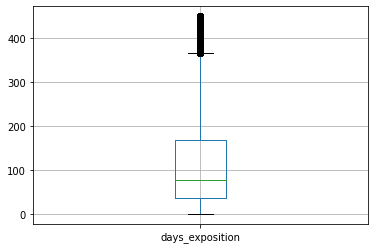

In [123]:
(data
    .query('days_exposition < 450')
    .boxplot('days_exposition')
)

In [124]:
data['days_exposition'].describe()

count    18665.000000
mean       173.223520
std        211.599157
min          1.000000
25%         43.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана - 95 дней. Среднее - 180 дней. Большая разница между медианой и средним, значит на среднюю влияют выбросы.

<AxesSubplot:ylabel='Frequency'>

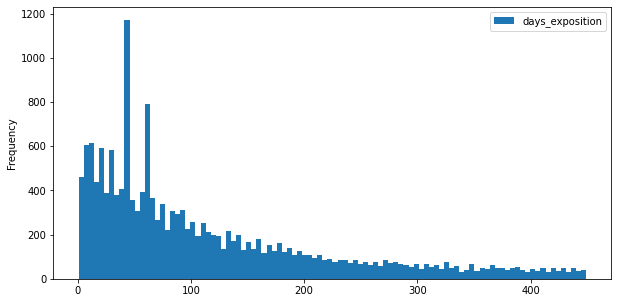

In [125]:
(data
    .query('days_exposition < 450')
    .plot(kind='hist', y='days_exposition', bins=100, figsize=(10,5))
)

Обратим внимание на гистограмму. Медиана - 95 дней (чуть больше 3 месяцев). Далее количество квартир, которые висят на продаже, уменьшается. Необычно быстрые продажи - до 3 месяцев. Необычно долгие - "усы" у "ящика", т.е. выше среднего, выше 180 дней, т.к. на среднее влияют выбросы. 

Часто риэлторы могут снимать объявления о продаже с просмотра, а потом выставлять заново, чтобы квартира была в топе просмотров, как новая.

Посмотрим, какие факторы могут влиять на стоимость объекта.

Перед поиском корреляции подготовим столбик floor_category для корреляции и переведем str в int.

In [126]:
data['floor_category_number'] = data['floor_category'].map({'первый':1, 'последний':3, 'другой':2})

Корреляция между last_price и total_area составляет: 70.40%
Корреляция между last_price и living_area составляет: 59.79%
Корреляция между last_price и kitchen_area составляет: 46.90%
Корреляция между last_price и rooms составляет: 45.72%
Корреляция между last_price и floor_category_number составляет: 3.78%
Корреляция между last_price и exposition_day составляет: -1.28%
Корреляция между last_price и exposition_month составляет: 0.52%
Корреляция между last_price и exposition_year составляет: -0.03%


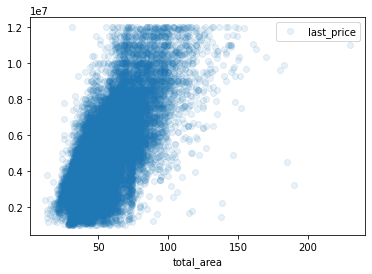

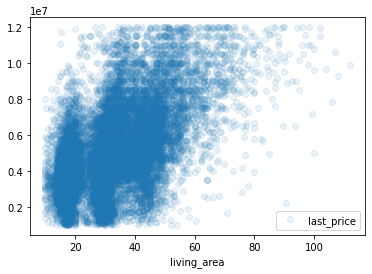

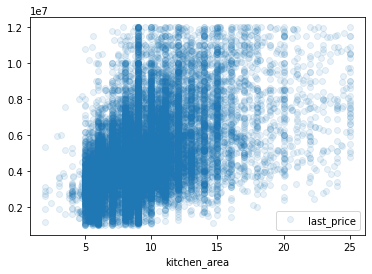

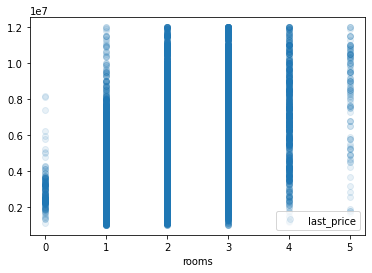

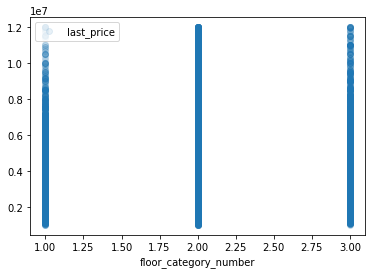

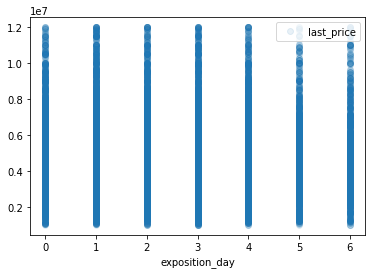

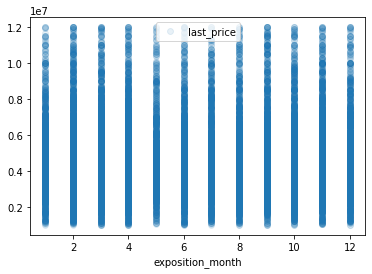

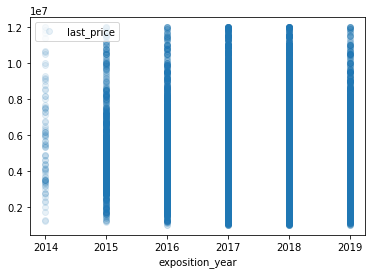

In [127]:
factors = ['total_area',
           'living_area',
           'kitchen_area',
           'rooms',
           'floor_category_number',
           'exposition_day',
           'exposition_month',
           'exposition_year']

for factor in factors:
    correlation = data['last_price'].corr(data[factor])
    data.plot(y='last_price', x=factor, style='o',alpha=0.1)
    
    print(f'Корреляция между last_price и {factor} составляет: {correlation:0.2%}')


**Вывод:** Положительная корреляция есть у цены и площади (общей и жилой). Меньше на стоимость влияет площадь кухни и количество комнат. На стоимость практически не влияет этаж, на котором находится квартира. День, месяц и год не влияют на стоимость недвижимости.

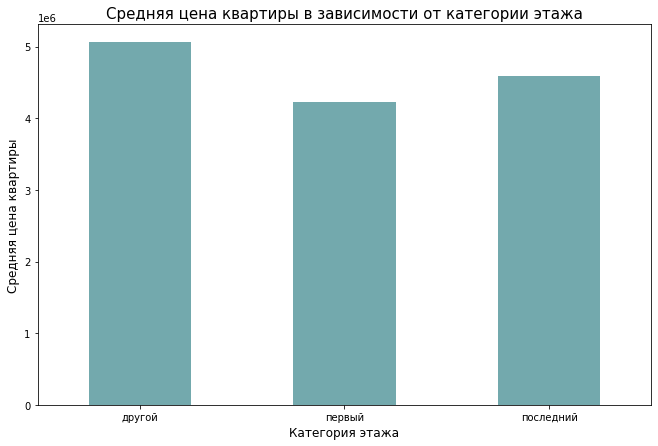

In [142]:
# код ревьюера

data.groupby('floor_category')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [128]:
# сделаем сводную таблицу по расположению и цены за кв.м.
top_localities = data.pivot_table(index='locality_name', values='price_per_sq_m', aggfunc=['count', 'mean'])
# переименнуем столбцы
top_localities.columns = ['count', 'mean']
# отсортируем данные по убыванию и возьмем первые 10 значений
top_localities = top_localities.sort_values('count', ascending=False).head(10)
top_localities

,count,mean
locality_name,,
санкт-петербург,13611,105534.250606
поселок мурино,549,85596.054645
поселок шушары,437,78627.645309
всеволожск,392,67120.795918
колпино,335,75247.898507
пушкин,334,100344.260479
поселок парголово,326,90331.840491
гатчина,302,68494.410596
деревня кудрово,295,92603.349153


In [129]:
#самая высокая стоимость
top_localities[top_localities['mean']==top_localities['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,13611,105534.250606


In [130]:
#самая низкая стоимость
top_localities[top_localities['mean']==top_localities['mean'].min()]

,count,mean
locality_name,,
выборг,229,58364.28821


<AxesSubplot:xlabel='locality_name'>

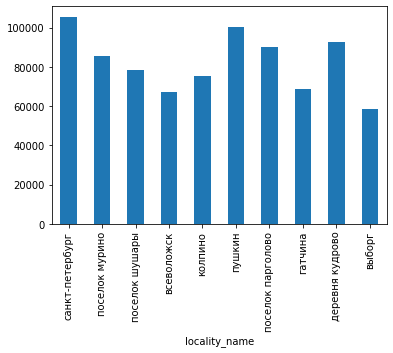

In [131]:
top_localities['mean'].plot(kind='bar')

Самая высокая цена за метр - в Санкт-Петербурге. Второе место занимает г. Пушкин. Самая низкая - в Выборге.

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Посмотрим, как стоимость объектов зависит от расстояния до центра города.

In [132]:
spb = data.loc[data['locality_name'] == 'санкт-петербург']

Удалим пропуски, т.к. их не очень много.

In [133]:
spb['city_centers_nearest'].isna().sum()

41

In [134]:
spb = spb.dropna(subset=['city_centers_nearest'])

In [135]:
spb['city_centers_nearest'].isna().sum()

0

Просмотрим столбец для Петербурга с расстоянием до центра в километрах.

In [136]:
spb['city_centers_nearest_km'].describe().astype(int)

count    13570
mean        12
std          4
min          0
25%         10
50%         13
75%         15
max         29
Name: city_centers_nearest_km, dtype: int64

Построим диаграмму размаха.

<AxesSubplot:>

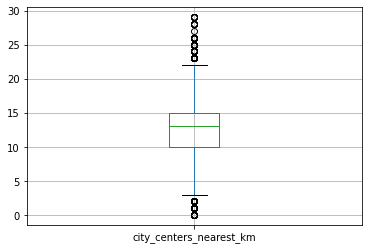

In [137]:
spb.boxplot('city_centers_nearest_km')

Больше 25 км от центра уже не считается центром Петербурга, если смотреть по диаграмме размаха.

In [138]:
spb = spb.loc[spb['city_centers_nearest_km'] < 25]

<AxesSubplot:>

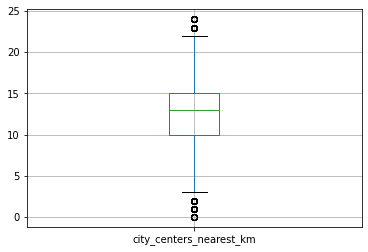

In [139]:
spb.boxplot('city_centers_nearest_km')

Расстояние от центра варьируется от 6 до 15 км.

Найдем среднюю цену за метр для Санкт-Петербурга.

In [140]:
mean_price_per_km = spb['last_price'].sum() / spb['city_centers_nearest_km'].sum()
mean_price_per_km.round()

469554.0

Цена одного км - 701890 руб.

<AxesSubplot:xlabel='city_centers_nearest_km'>

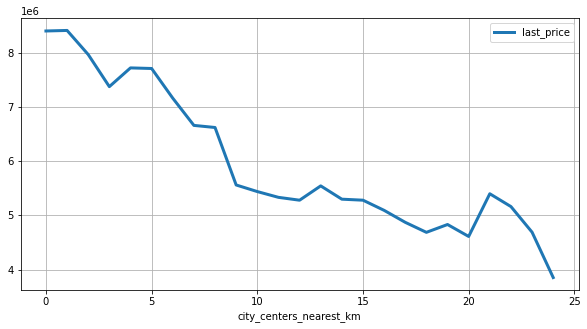

In [141]:
(spb
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(figsize=(10,5), grid=True, linewidth=3)
)

По графику видно, что цена за кв.м. начинает падать, если квартира находится дальше 10 км от центра, значит центр находится в пределах 10 км.

**Вывод:** Корреляция есть у цены и площадей (общей и жилой). Меньше на стоимость влияет площадь кухни и количество комнат. На стоимость практически не влияет этаж, на котором находится квартира. День, месяц и год не влияют на стоимость недвижимости. Самая высокая цена за метр - в Санкт-Петербурге. Второе место занимает г. Пушкин. Самая низкая - в Выборге. Цена одного км - 701890 руб. Среднее время снятия объявления о продаже - 3 месяца.

### Общий вывод

Был обработан архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Обработали пропущенные значения там, где это необходимо, заменили типы данных на заявленные в описании для удобной работы. Посчитали и добавили в таблицу столбцы: цена квадратного метра жилья, разделили даты размещения объявлений на дни, месяцы и годы, категоризировали этажи и добавили расстояние до центра города в км. Изучили следующие параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. Были определены аномалии и выбросы в параметрах. 
Мы можем сделать следующие выводы:
1. На стоимость квартиры больше всего влияют количество комнат, общая площадь, жилая площадь, площадь кузни. Число, месяц, год и этаж, на котором располагается квартира не влияют на конечную стоимость. 
2. Среднее время продажи квартиры - 95 дней. Однако здесь стоит быть аккуратным, т.к. снятое объявление не значит, что квартира продана. Часто риэлторы могут снимать объявления о продаже с просмотра, а потом выставлять заново, чтобы квартира была в топе просмотров, как новая.
3. Меньше всего объявлений по квартирам, которые находятся на 1 и последних этажах. Эти объявления составляют меньше 1/3 от всех объявлений.
4. Если смотреть на время публикации объявления о продаже, то больше всего объявлений о продаже квартир размещают в феврале, меньше всего перед началом лета - в мае. В выходные дни объявлений меньше всего. Рынок недвижимости достиг своего пика по предложениям о продаже квартир в 2017 и 2018 годах. Далее начался большой спад.
5. Средняя цена за кв.м - 99 тыс. руб. для всех квартир в выборке.
6. В Санкт-Петербурге самые дорогие квартиры. В Выборге - самые дешевые. Центр Петербурга находится в пределах 10 км. Каждый раз, с увеличением расстояния на 1 км, стоимость объекта увеличивается на 701890 руб.
Можно предположить, что люди выбирают 1-2 комнатные квартиры не в Санкт-Петребурге, но рядом с ним, с средней стоимостью в 99 тыс.руб. за кв.м. и высотой потолков 2,75, не на первых и не на последних этажах. В 2019 число предложений сократилось почти в 4 раза. Это может значить изменение рынка недвижимости в пользу более эконом вариантов.